In [1]:
# Basic TF model

from IPython.display import clear_output

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/rose/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

In [3]:

from tensorflow import keras, reshape
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Sequential


model = keras.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss = SparseCategoricalCrossentropy(from_logits=True),
              metrics=['loss', 'accuracy', keras.metrics.SparseCategoricalAccuracy()]
             )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          16448     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [41]:

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_val = X_train[40000:]
X_train = X_train[:40000]
Y_val = Y_train[40000:]
Y_train = Y_train[:40000]

X_train = X_train.reshape([-1,28,28,1])
X_val = X_val.reshape([-1,28,28,1])
history = model.fit(X_train, Y_train, epochs=4, 
                    validation_data=(X_val, Y_val))

In [42]:
print(history.history)
res = model.evaluate(X_test.reshape([-1,28,28,1]), Y_test)
print(f"Accuracy {res[1]}  loss {res[0]}")


{'loss': [0.006089245952024975, 0.009153922718287482, 0.0053986805973866465, 0.004673206021305083], 'acc': [0.998025, 0.997075, 0.998225, 0.998625], 'sparse_categorical_accuracy': [0.998025, 0.997075, 0.998225, 0.998625], 'val_loss': [0.023980754922146387, 0.02528401826255449, 0.027394173544897878, 0.027988647590026405], 'val_acc': [0.99295, 0.99335, 0.99255, 0.99245], 'val_sparse_categorical_accuracy': [0.99295, 0.99335, 0.99255, 0.99245]}
10000/10000 [==============================] - 1s 54us/sample - loss: 0.0400 - acc: 0.9905 - sparse_categorical_accuracy: 0.9905
Accuracy 0.9904999732971191  loss 0.03996482478151777


<AxesSubplot:title={'center':'Confusion Matrix'}>

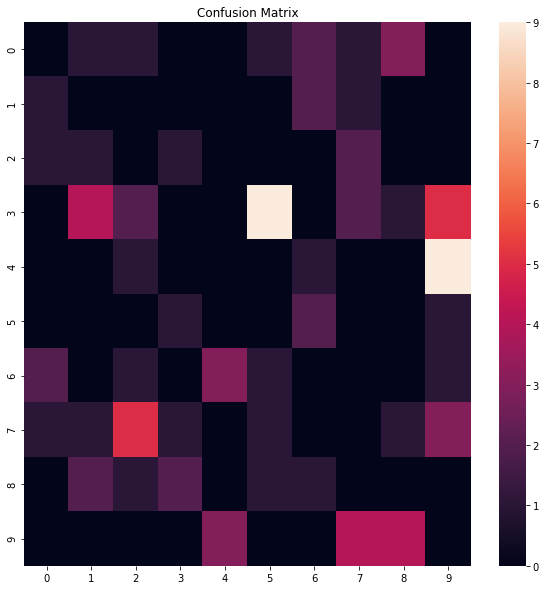

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
predictions = model.predict(X_test.reshape([-1,28,28,1]))
pred = np.argmax(predictions, axis=1)

conf_mat = confusion_matrix(pred, Y_test)
np.fill_diagonal(conf_mat, 0)
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
sns.heatmap(conf_mat)

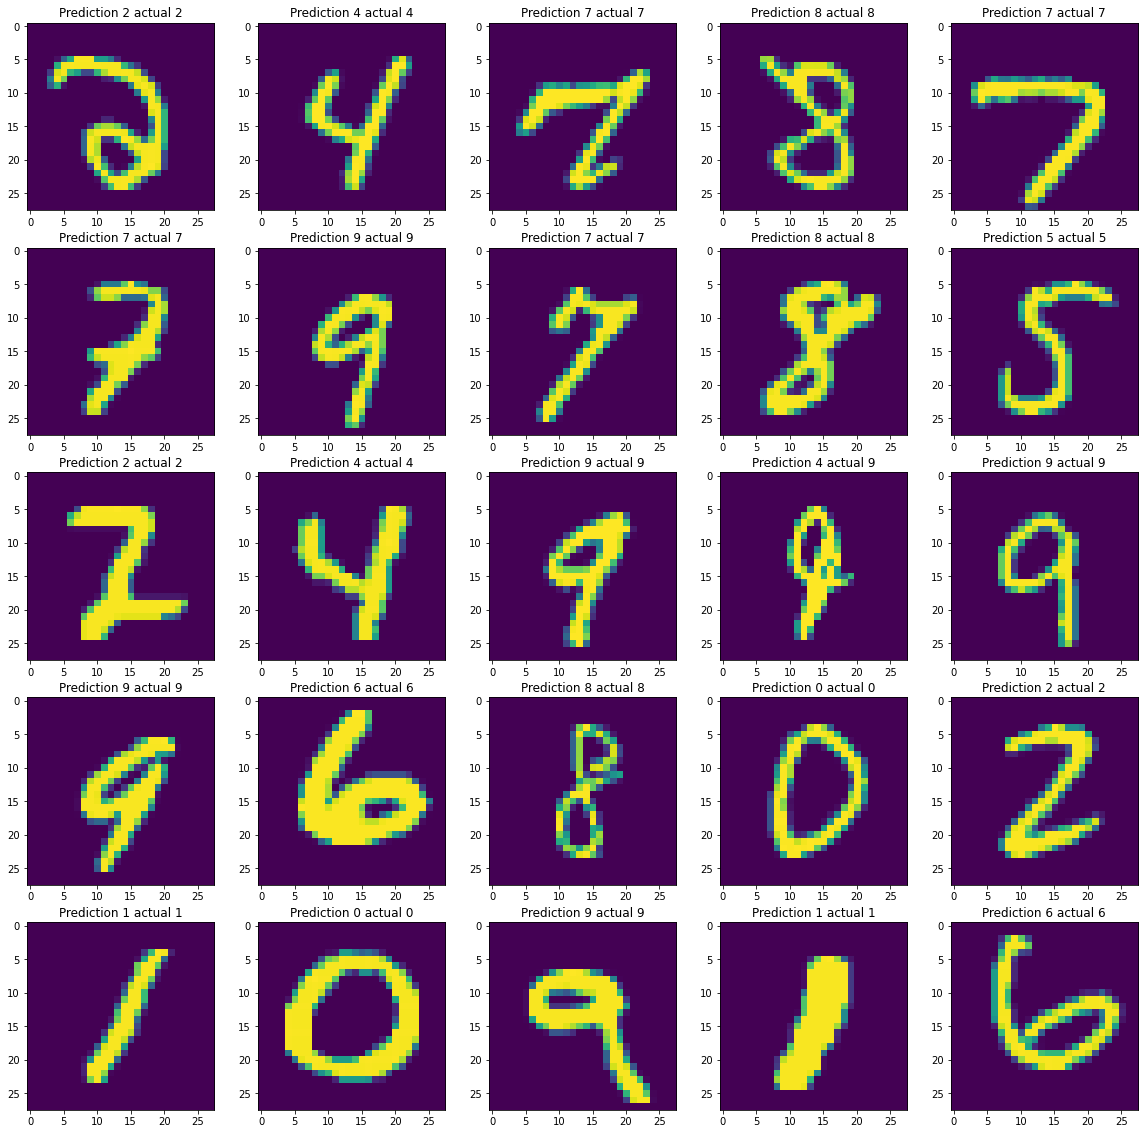

In [44]:
# Check a few 
nrow, ncol= 5, 5
cnt=0


fig = plt.figure(figsize=(20, 20))
for i in range(nrow):
    for j in range(ncol):
        cnt += 1
        samp = np.random.randint(len(X_test))
        sample = X_test[samp]
        p = pred[samp]
        act = Y_test[samp]
        plt.subplot(nrow, ncol, cnt)
        plt.imshow(sample.reshape(28,28))
        plt.title(f"Prediction {p} actual {act}")
plt.show()

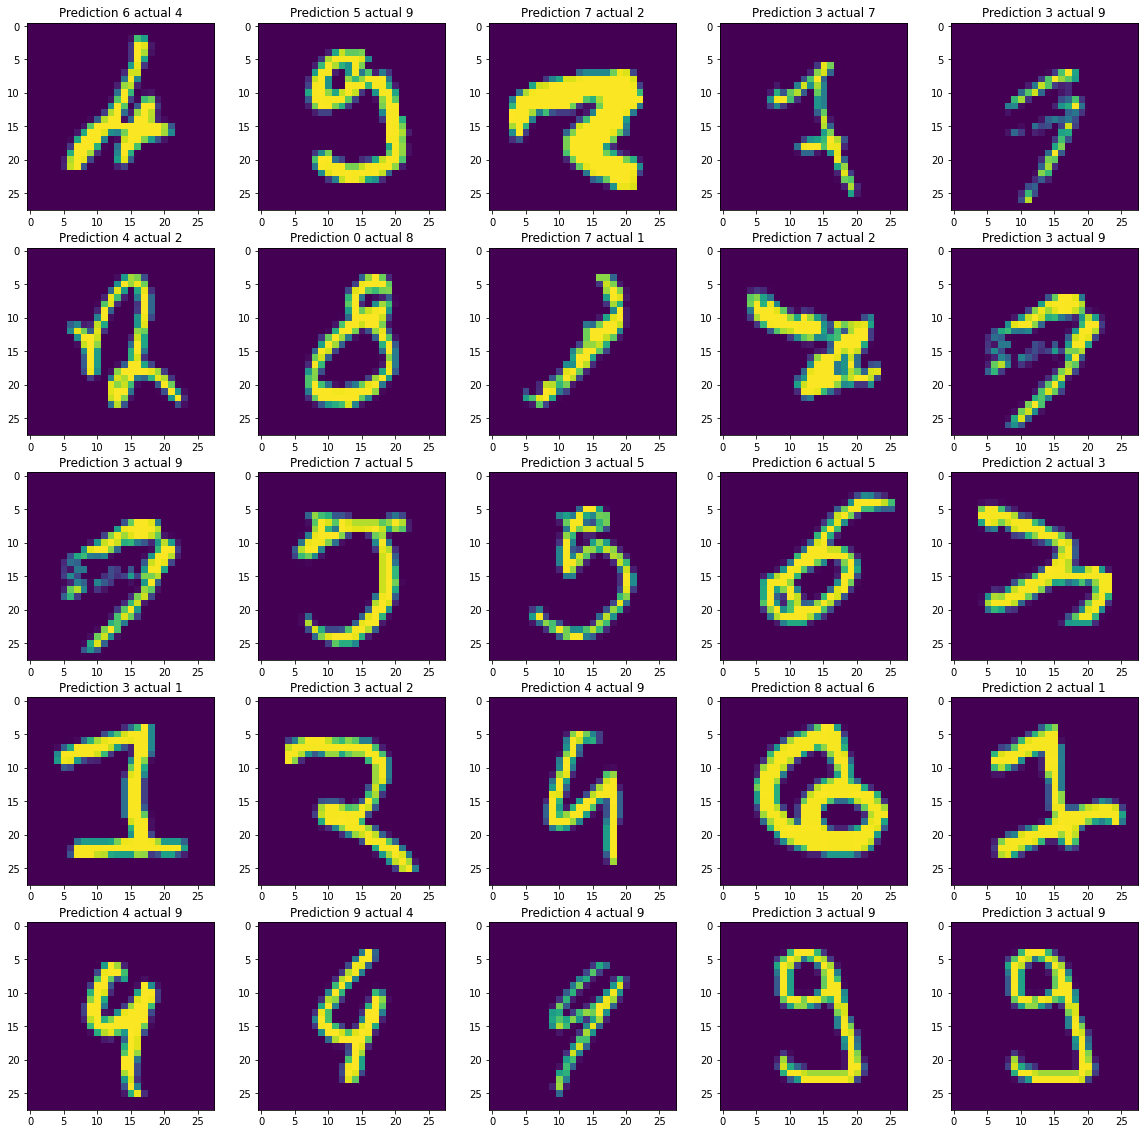

In [49]:
# Check a few wrong ones
nrow, ncol= 5, 5
cnt=0
wrongs = np.where(pred != Y_test)

fig = plt.figure(figsize=(20, 20))
for i in range(nrow):
    for j in range(ncol):
        cnt += 1
        samp = np.random.choice(wrongs[0])
        sample = X_test[samp]
        p = pred[samp]
        act = Y_test[samp]
        plt.subplot(nrow, ncol, cnt)
        plt.imshow(sample.reshape(28,28))
        plt.title(f"Prediction {p} actual {act}")
plt.show()

In [50]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)